In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [395]:
def load_image(image_path):
    return cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

In [396]:
# in_folder = '/Users/iman/github/avi/test1/frames_s/'
in_folder = '/Users/iman/github/avi/test3/video/'

# Load two images
image1 = load_image(in_folder+'testimony0900.jpg')
image2 = load_image(in_folder+'testimony1080.jpg')
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))


In [386]:
def add(image1, image2):
    blended_image = cv2.add(image1, image2)
    return blended_image

def screen(image1, image2):
    inverted_image1 = cv2.bitwise_not(image1)
    inverted_image2 = cv2.bitwise_not(image2)
    blended_image = cv2.bitwise_not(cv2.multiply(inverted_image1, inverted_image2))
    return blended_image

def multiply(image1, image2):
    blended_image = cv2.multiply(image1, image2)
    return blended_image

def overlay(image1, image2, threshold=0.5):
    blended_image = cv2.addWeighted(image1, threshold, image2, 0.5, 0)
    # blended_image = np.where(image1 < threshold, 2 * image1 * image2, 1 - 2 * (1 - image1) * (1 - image2))
    return blended_image

def overlay_glitch(image1, image2, threshold=0.5):
    # blended_image = cv2.addWeighted(image1, threshold, image2, 0.5, 0)
    blended_image = np.where(image1 < threshold, 2 * image1 * image2, 1 - 2 * (1 - image1) * (1 - image2))
    return blended_image

In [387]:
def fuzzy_edges(image, min_g=1, max_g=4):
    kernel_size = (25, 25)  # Adjust the kernel size for the desired blur effect
    blurred_image = cv2.GaussianBlur(image, kernel_size, 0)
    # Create a mask for the edges using Canny edge detection
    edges = cv2.Canny(image, min_g, max_g)  # Adjust the threshold values for desired edge detection
    edge_mask = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    # Combine the blurred image with the original image using the edge mask
    fuzzy_edges_image = np.where(edge_mask != 0, blurred_image, image)
    return edges

In [ ]:
orig = overlay(image1, image2, threshold=0.5)

In [382]:
threshold = 0.9
blended_image = add(blended_image, image2)
# blended_image = overlay_glitch(blended_image, image2, threshold=threshold)


In [ ]:
f_image1 = fuzzy_edges(image2, min_g=1,max_g=30)
f3_image1 = cv2.merge((f_image1,f_image1,f_image1))
blended_image = multiply(f3_image1, image2)

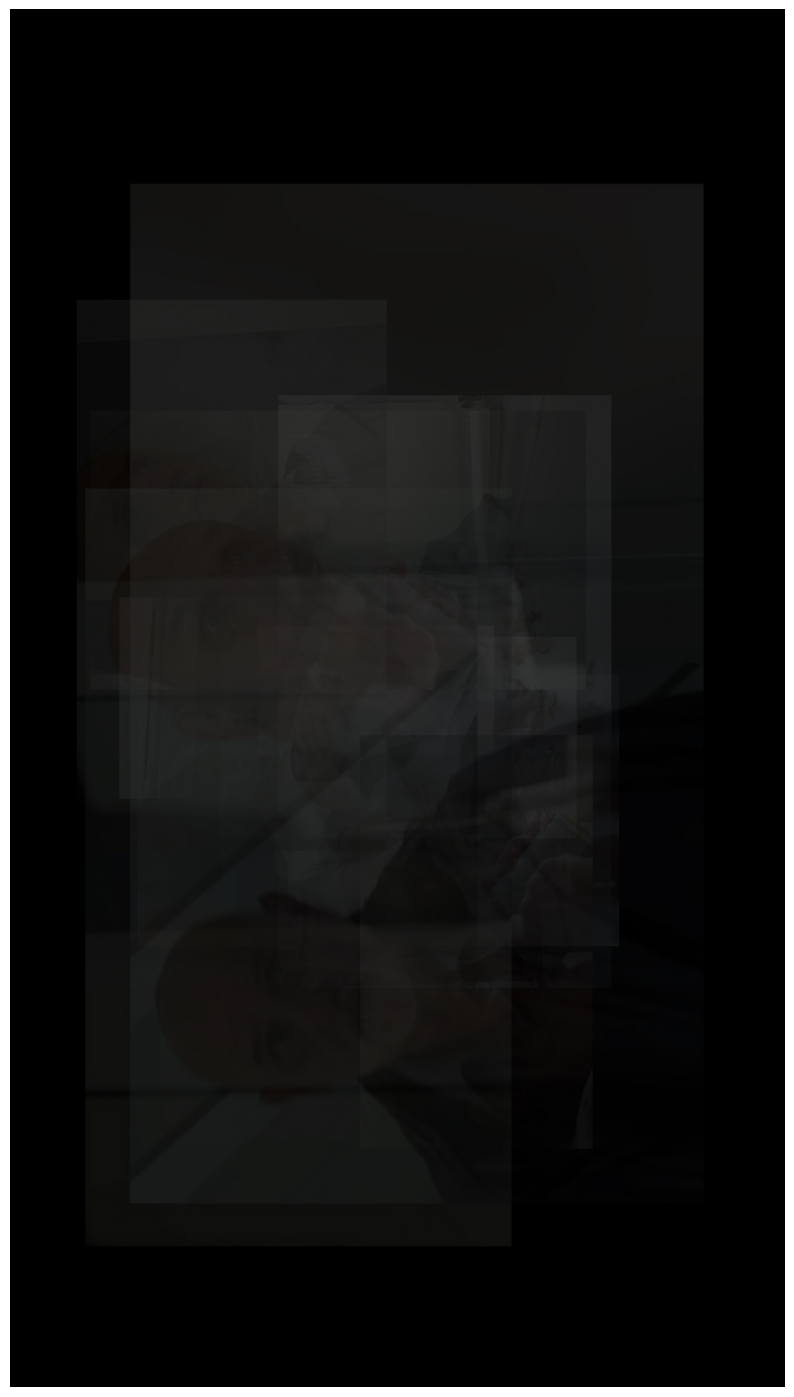

In [393]:
plt.figure(figsize = (10,20))
plt.imshow(image2)
plt.axis('off')
plt.show()

In [296]:
import random
import PIL

In [380]:
im1 = PIL.Image.fromarray(f3_image1, 'RGB')
im1.save("/Users/iman/github/avi/lines3.png")